In [1]:
import dypac as dypac
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr
from kmodes.kmodes import KModes
import sys
import numpy as np

In [2]:
adhd_dataset = datasets.fetch_adhd(n_subjects=1)
epi_filename = adhd_dataset.func[0]

In [3]:
masker = NiftiMasker(smoothing_fwhm=5, standardize=True, detrend=True)
masker.fit(epi_filename)
y = masker.transform(epi_filename)

In [4]:
n_replications = 50
n_clusters = 7
onehot = dypac._replicate_clusters(y.transpose(), n_clusters=n_clusters, subsample_size=40, 
                                   n_replications=n_replications, max_iter=20, n_init=1, n_jobs=-1, verbose=1)

100%|██████████| 50/50 [00:45<00:00,  1.11it/s]


In [5]:
states = dypac._find_states(onehot, n_init=5, n_clusters=14, n_jobs=-1, max_iter=5, threshold_sim=0.5)

In [6]:
stab_maps, dwell_time = dypac._stab_maps(onehot, states, n_replications=n_replications, n_clusters=14)
stab_maps = stab_maps.transpose()


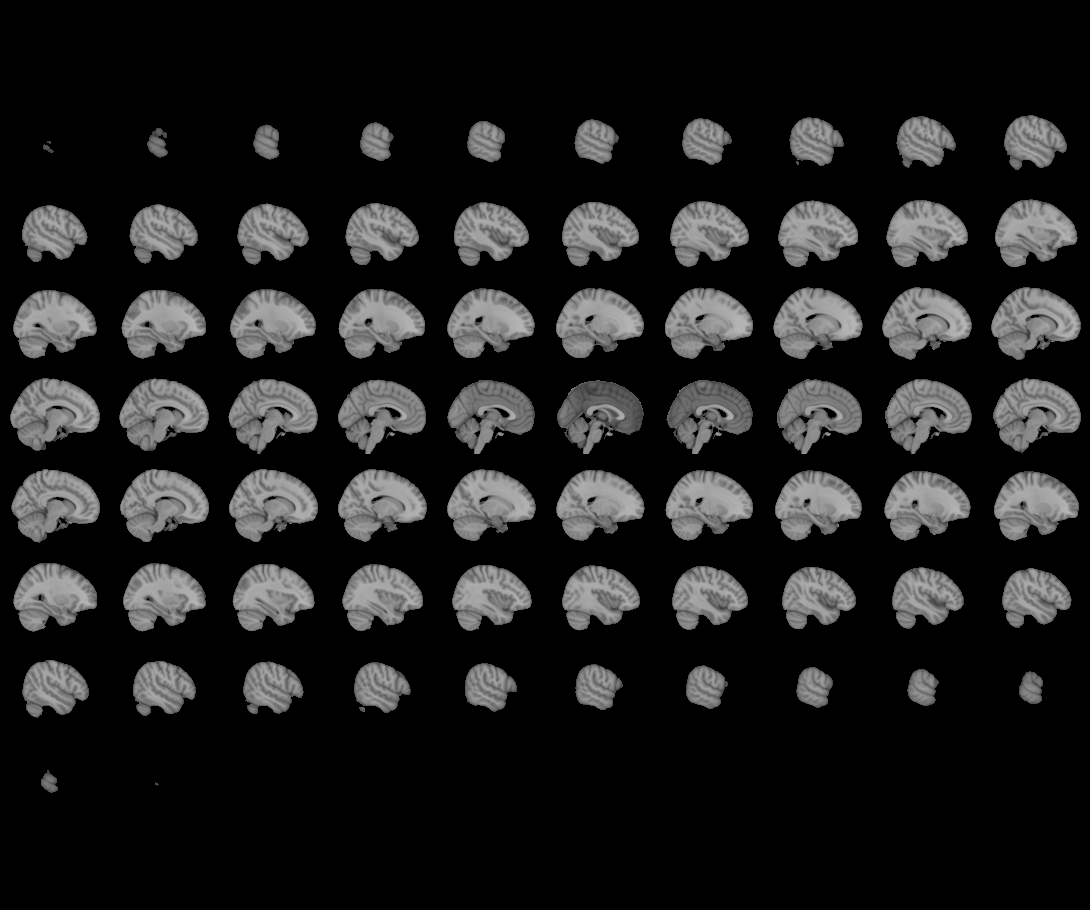
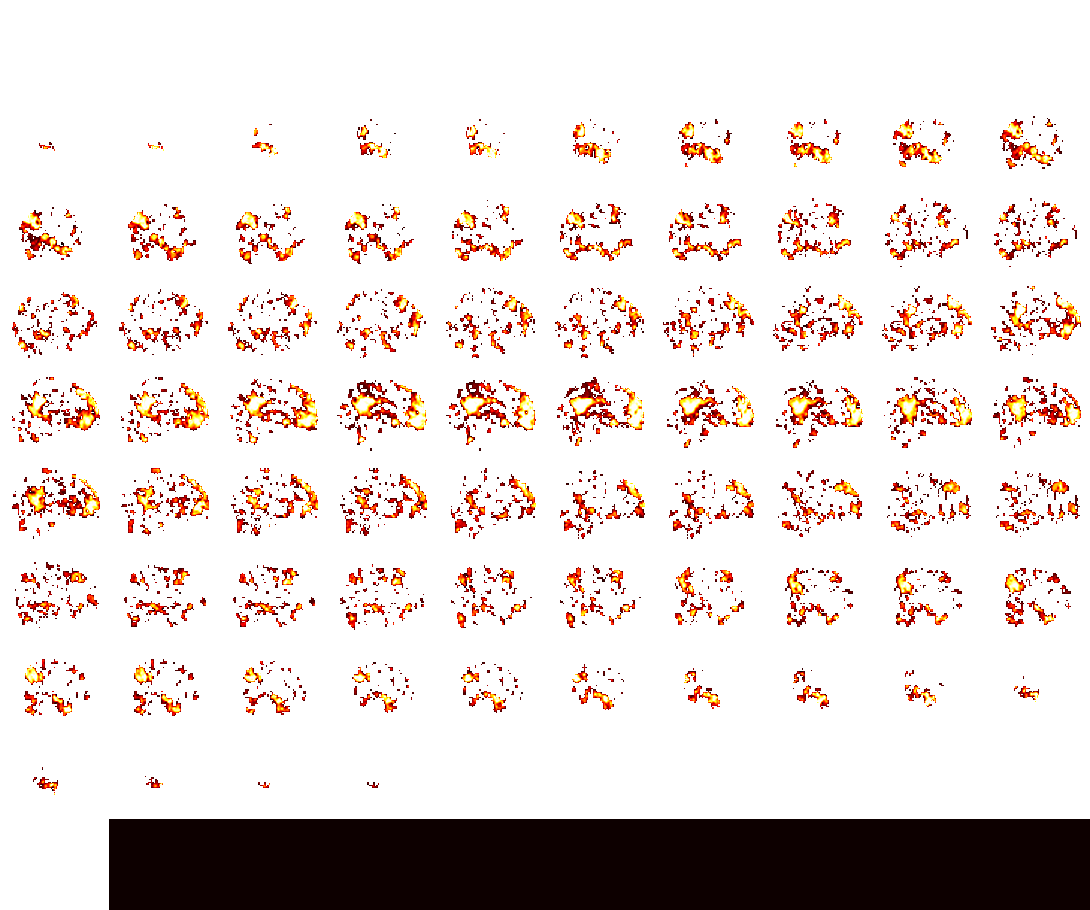

In [7]:
num_comp = 1
comp = masker.inverse_transform(stab_maps[num_comp,:])
plotting.view_img(comp, threshold=0.1, vmax=1, title="dowell time = {dt}".format(dt=dwell_time[num_comp]))